<a href="https://colab.research.google.com/github/EgorSolovei/ML-in-nuclear-physics/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
data = pd.read_csv('data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data = data.rename(columns={"class": "class_param"})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2.0,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 # где-то плохая обработка, потому что классов только 4. Уберём плохие
data['class_param'].unique()

array([ 2.,  4.,  1.,  3.,  0., nan])

In [ ]:
data.class_param.fillna(0, inplace=True)
data = data.query('class_param != 0')
data['class_param'].unique()

array([2., 4., 1., 3.])

In [ ]:
data = data.astype({'class_param': 'int'})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.describe()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
count,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,198649.000000,...,198649.0,198649.0,198649.0,198649.0,198649.0,198649.0,198649.0,198649.0,198649.0,198649.0
mean,2.505067,0.838189,0.838007,0.919480,0.919994,0.949970,0.950853,0.972717,0.971412,0.970174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.123364,0.508307,0.506210,0.498817,0.489538,0.501044,0.508800,0.529071,0.515938,0.539439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,1.046076,1.046057,1.053260,1.053178,1.054461,1.054515,1.055167,1.055228,1.055043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,1.068070,1.068040,1.073041,1.072987,1.074423,1.074502,1.075448,1.075395,1.075325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.000000,1.101563,1.101819,1.116731,1.116703,1.122132,1.122738,1.125979,1.125949,1.125659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000000,22.356988,20.067375,24.324390,13.044851,23.456881,29.097425,25.195614,17.423935,46.542587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(198649, 193)

# Models

In [ ]:
Y = data['class_param']
X = data.drop(columns='class_param')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139054, 192), (59595, 192), (139054,), (59595,))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parametrs = {'max_depth': range(10, 16), 'criterion': ['gini', 'entropy']}
tree_clf = DecisionTreeClassifier()
model_gridCV = GridSearchCV(tree_clf, parametrs, cv=3)

In [ ]:
model_gridCV.fit(X_train, y_train)

In [ ]:
model_gridCV.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [ ]:
model_gridCV.best_score_

In [ ]:
res_df = pd.DataFrame(model_gridCV.cv_results_)

<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

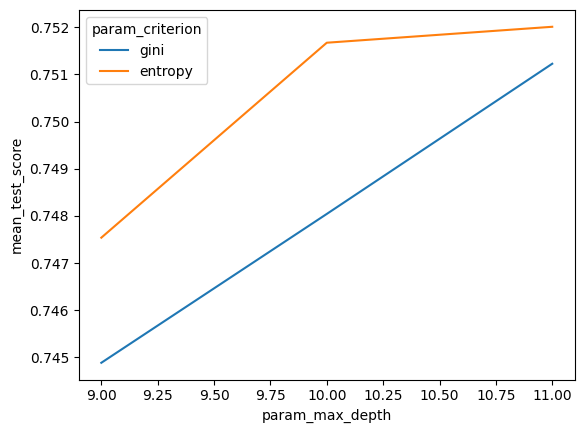

In [ ]:
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_criterion', data=res_df)

In [ ]:
res_df.drop(columns='params')

In [ ]:
best_tree = model_gridCV.best_estimator_

In [ ]:
y_pred = best_tree.predict(X_train)

In [ ]:
train_score = best_tree.score(X_train, y_train)
test_score = best_tree.score(X_test, y_test)

In [ ]:
train_score, test_score

(0.7794166295108376, 0.7499454652235926)

In [ ]:
def train_model(model, param, x_tr, y_tr, x_ts, y_ts):
    model_GridCV = GridSearchCV(model, param, cv=5)
    model_GridCV.fit(x_tr, y_tr)

    print(f'Лучшие параметры: {model_GridCV.best_params_}')

    best_model = model_GridCV.best_estimator_
    

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(5, 16, 2), 'max_depth': range(3, 7), 'criterion': ['gini', 'entropy']}

In [ ]:
GridCV_rf = GridSearchCV(clf_rf, parametrs, n_jobs=-1)

In [ ]:
GridCV_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 7),
                         'n_estimators': range(5, 16, 2)})

In [ ]:
GridCV_rf.best_score_

0.8094265466915809

In [ ]:
GridCV_rf.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 15}

In [ ]:
best_rf = GridCV_rf.best_estimator_

In [ ]:
res = pd.DataFrame(GridCV_rf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.245850,0.761785,0.057850,0.026687,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.721585,0.704218,0.691885,0.709719,0.713376,0.708157,0.009903,47
1,2.296304,0.057362,0.041604,0.001258,gini,3,7,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.725504,0.719751,0.727698,0.724893,0.731715,0.725912,0.003899,44
2,5.823328,1.640788,0.174737,0.087698,gini,3,9,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.735213,0.725792,0.722628,0.710654,0.741352,0.727128,0.010594,43
3,5.536405,1.247880,0.098647,0.061042,gini,3,11,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.727913,0.741469,0.741613,0.732660,0.742035,0.737138,0.005795,39
4,5.896659,1.377894,0.114560,0.026046,gini,3,13,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.738916,0.749452,0.749344,0.741937,0.755196,0.746969,0.005825,36
5,6.982969,1.018931,0.133210,0.051702,gini,3,15,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.746180,0.729388,0.744921,0.742296,0.747753,0.742107,0.006606,37
6,2.780649,0.432617,0.055350,0.017570,gini,4,5,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.748912,0.754629,0.737046,0.748589,0.747033,0.747242,0.005713,35
7,3.612348,0.974450,0.046833,0.002885,gini,4,7,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.761857,0.755960,0.762144,0.761533,0.756958,0.759690,0.002664,32
8,4.097406,0.546694,0.069595,0.025180,gini,4,9,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.763115,0.770918,0.766531,0.755456,0.765696,0.764343,0.005105,27
9,4.549076,0.450031,0.089181,0.031631,gini,4,11,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.772320,0.768725,0.762864,0.770163,0.775297,0.769874,0.004146,25
